In [91]:
'''
# CLASSIFY IMAGES. CLASSIFICA L'EXEMPLE DE 3 SCENES AMB ELS SEGÜENTS ALGORITMES DE CLASSIFICACIO
# K-Nearest-Neighbour
# Naive Bayes Classificator
# Regressió Logística
# Support Vector Machine
# Arbres de Decisió
# Random Forests
# Multi-Layer Perceptron (proto - Xarxa Neuronal)
# Primer fa data extraction (treu característiques de cada píxel per a poder tractar sobre dades numèriques)
'''

# imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse
import os
from scipy import stats


def extract_color_stats(image):
	# Parteix cada pixel en RGB i crea un vector amb 6 valors
	# La mitja i la desviacio estandard de cadascun dels 3 canals
	# També la mediana
	image = image.convert('RGB')
	(R, G, B) = image.split()
	features = [np.mean(R), np.mean(G), np.mean(B), np.std(R),
		np.std(G), np.std(B), np.median(R), np.median(G), np.median(B)]

	return features

#Seleccionar el model
print("Select model: knn, naive_bayes, logit, svm, decision_tree, random_forest, mlp")
modelsel = input()
dataset = "fruits"

# Defineix el diccionari de models. 
# Cada model cridarà a una funció diferent del sklearn
# fa l'equivalent a un switch
models = {
	"knn": KNeighborsClassifier(n_neighbors=2),
	"naive_bayes": GaussianNB(),
	"logit": LogisticRegression(solver="lbfgs", multi_class="auto"),
	"svm": SVC(kernel="poly"),
	"decision_tree": DecisionTreeClassifier(),
	"random_forest": RandomForestClassifier(n_estimators=2000),
	"mlp": MLPClassifier()
}

# grab all image paths in the input dataset directory, initialize our
# list of extracted features and corresponding labels
print("[INFO] extracting image features...")
imagePaths = paths.list_images(dataset)
data = []
labels = []

# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, compute color channel
	# statistics, and then update our data list
	image = Image.open(imagePath)
	# extreu característiques dels colors. Valors RBG de cada pixel, contrast, sobretot intensitat, etc etc etc.
	features = extract_color_stats(image)
	data.append(features)

	#agafa la label. La label es el nom de la carpeta a on està la imatge. Vas al path. vas dos passos enrere (del path), per trobar el nomd e la carpeta
	#i ho poses com a label.
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels)

# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.12, random_state=1000)

# train the model
print("[INFO] using '{}' model".format(modelsel))
model = models[modelsel]
model.fit(trainX, trainY)

# make predictions on our data and show a classification report


# Dates de train
print("[INFO] evaluating train cases...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=le.classes_))

# Dates de test
print("[INFO] evaluating test cases...")
predictions = model.predict(testX)
print(classification_report(testY, predictions,
	target_names=le.classes_))


Select model: knn, naive_bayes, logit, svm, decision_tree, random_forest, mlp
[INFO] extracting image features...
[INFO] using 'svm' model
[INFO] evaluating train cases...
              precision    recall  f1-score   support

       Apple       0.17      0.25      0.20         4
      Banana       0.50      1.00      0.67         2
      Cherry       0.00      0.00      0.00         5
     Chickoo       0.25      0.40      0.31         5
      Grapes       0.50      0.83      0.62         6
        Kiwi       1.00      0.67      0.80         3
       Mango       0.00      0.00      0.00         5
      Orange       0.67      0.57      0.62         7
  Strawberry       0.40      0.29      0.33         7

    accuracy                           0.41        44
   macro avg       0.39      0.45      0.39        44
weighted avg       0.37      0.41      0.37        44

[INFO] evaluating test cases...
              precision    recall  f1-score   support

       Apple       0.17      0.25   

D:\Documents\GitHub\M6-23-24\M6-UF3\MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Documents\GitHub\M6-23-24\M6-UF3\MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Documents\GitHub\M6-23-24\M6-UF3\MachineLearning\venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

D:\Documents\GitHub\M6-23-24\M6-UF3\MachineLearning\venv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
D:\Documents\GitHub\M6-23-24\M6-UF3\MachineLearning\venv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
D:\Documents\GitHub\M6-23-24\M6-UF3\MachineLearning\venv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
D:\Documents\GitHub\M6-23-24\M6-UF3\MachineLearning\venv\lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.
  func(

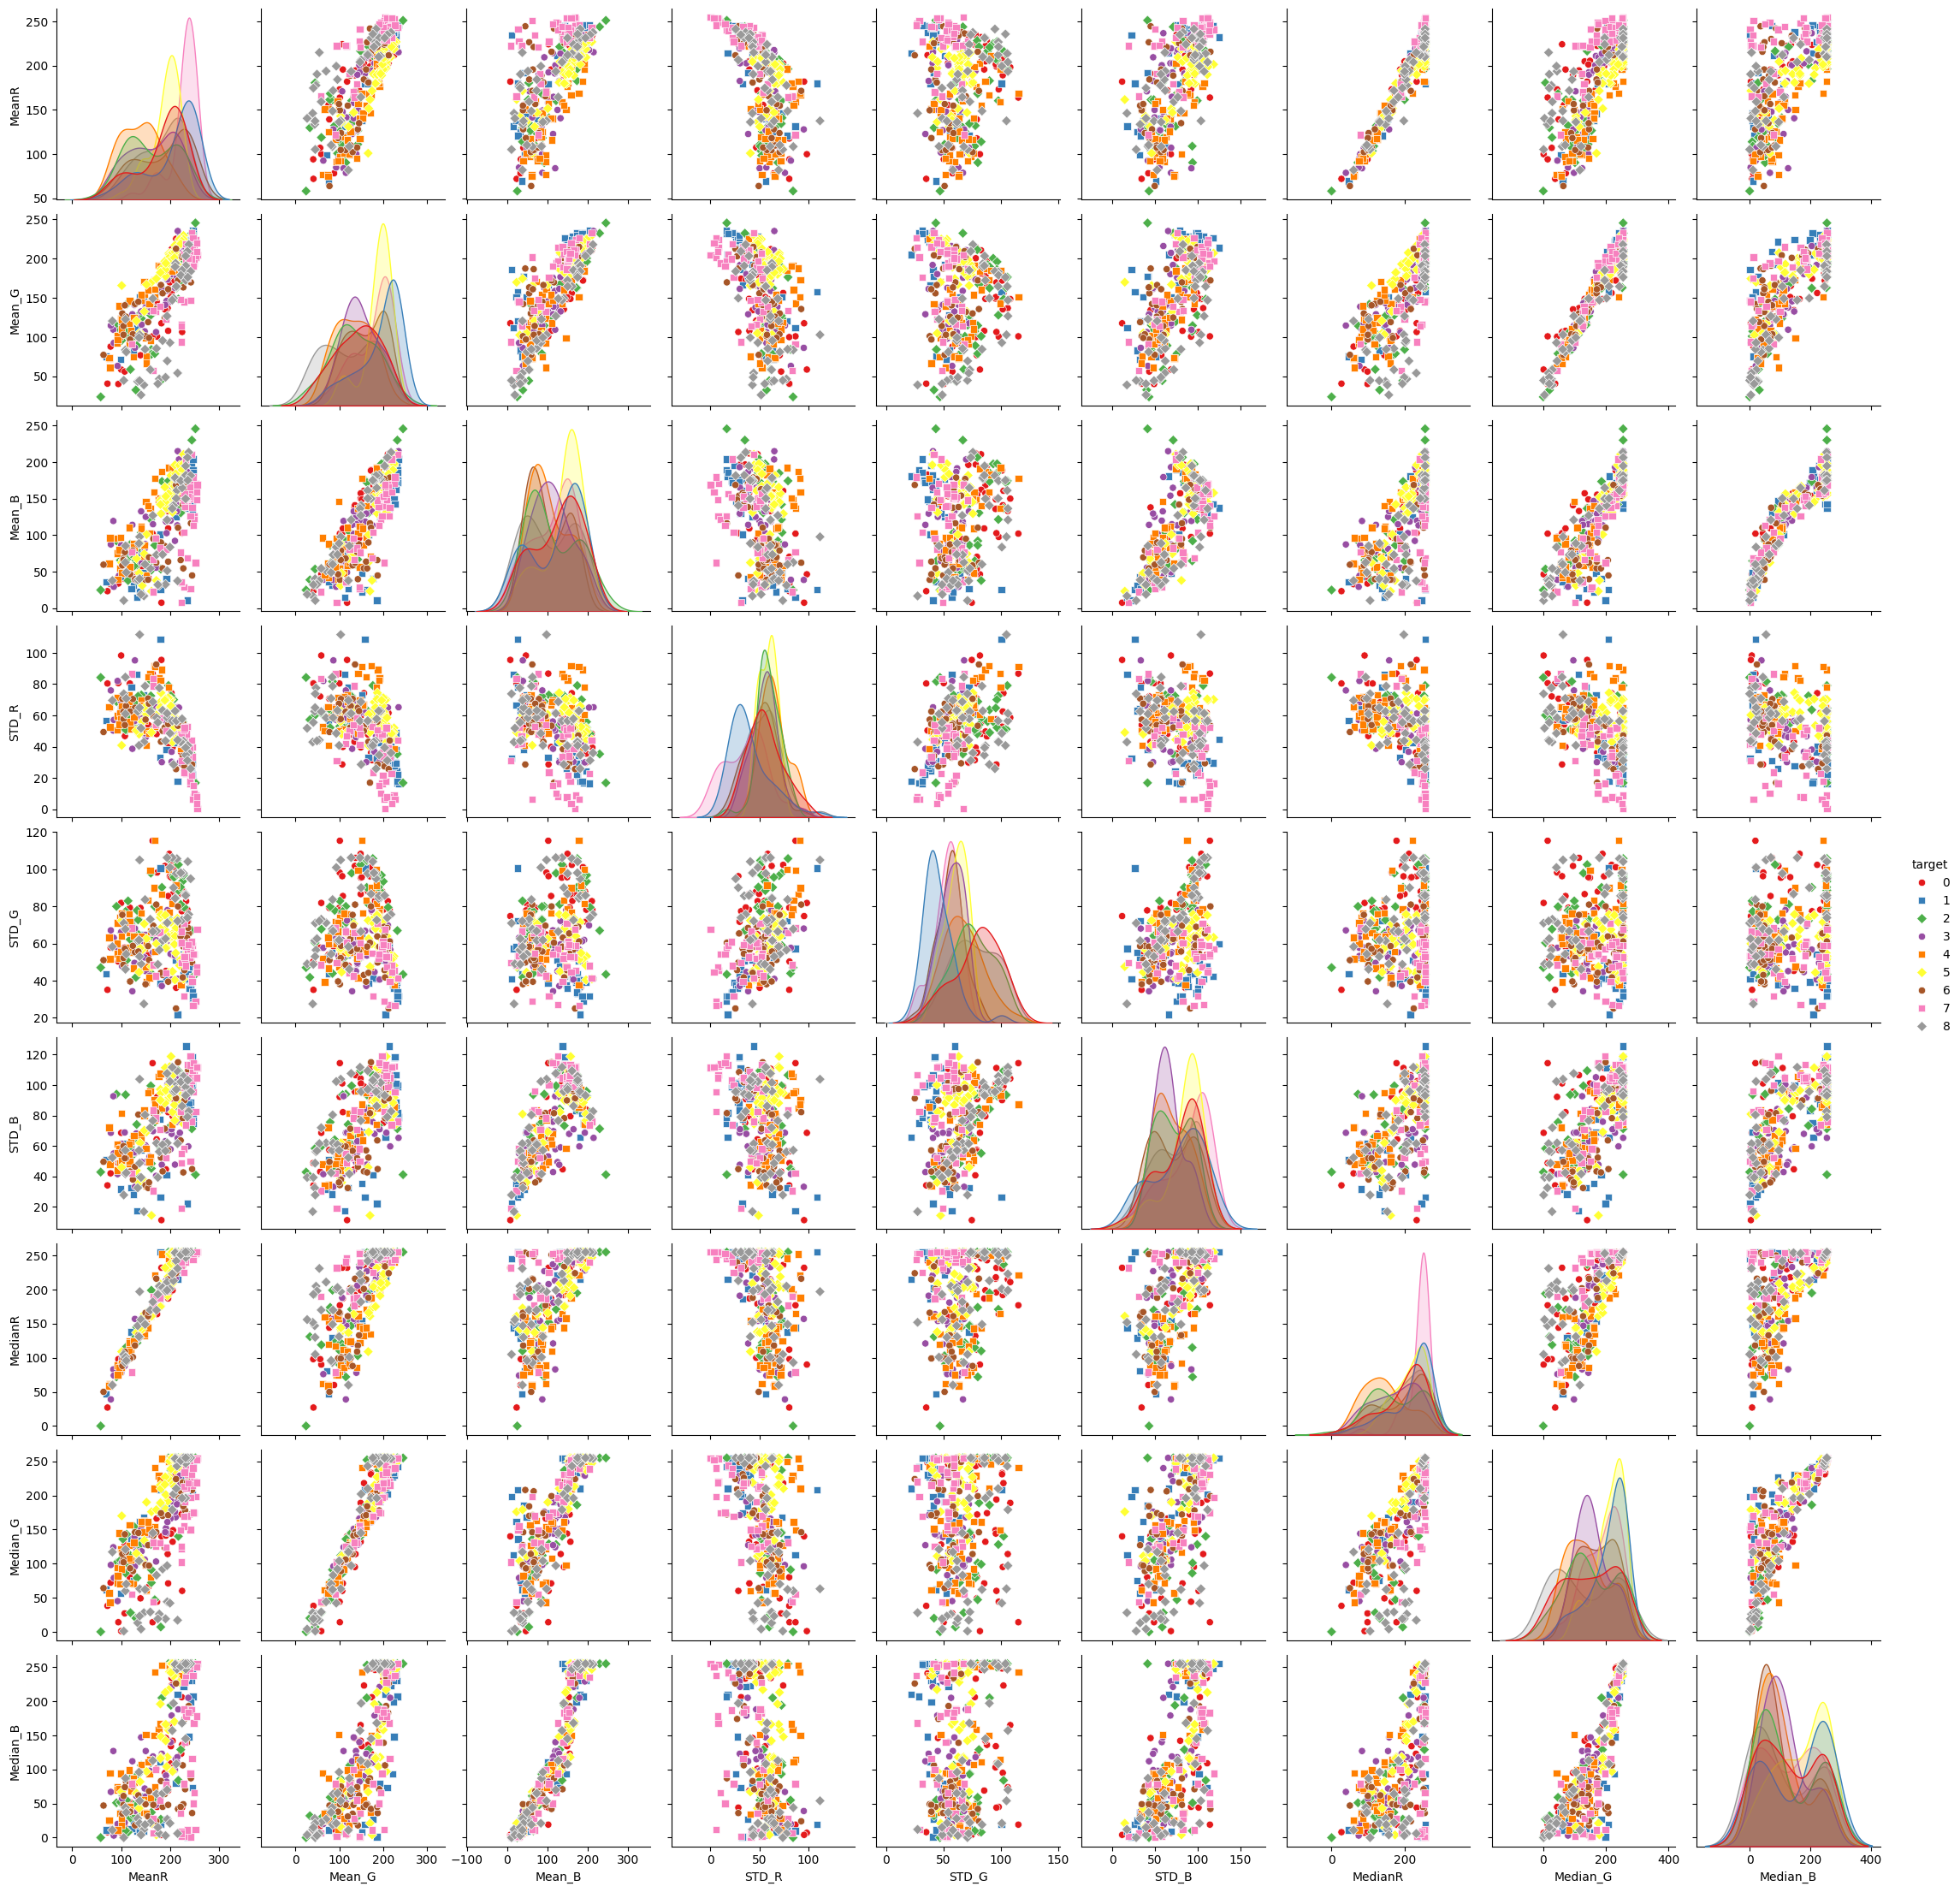

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris_df = pd.DataFrame(data, columns=['MeanR', 'Mean_G', 'Mean_B','STD_R', 'STD_G', 'STD_B', 'MedianR', 'Median_G', 'Median_B'])
iris_df['target'] = labels

# Dibuixa gràfics de dispersió per a parelles de característiques
sns.pairplot(iris_df, hue='target', palette='Set1', markers=["o", "s", "D"])
plt.show()